<a href="https://colab.research.google.com/github/nishultomar/TensorflowExercises/blob/master/Tensorflow_Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression**

In [0]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
x_data = np.linspace(0.0,10.0,1000000)
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [91]:
noise = np.random.randn(len(x_data))
noise

array([-0.27745422, -0.38369021, -0.33809646, ...,  0.1227278 ,
       -1.63558842,  0.72041734])

In [0]:
#y=mx+b, b=5 and m = 0.5
y_true=(0.5*x_data)+5+noise

In [93]:
x_df = pd.DataFrame(data = x_data,  columns=['X-Data'])
x_df.head()

,X-Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [94]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])
y_df.head()

,Y
0,4.722546
1,4.616315
2,4.661914
3,5.259326
4,5.589456


In [95]:
my_data = pd.concat([x_df,y_df],axis = 1)
my_data.head()

,X-Data,Y
0,0.00000,4.722546
1,0.00001,4.616315
2,0.00002,4.661914
3,0.00003,5.259326
4,0.00004,5.589456


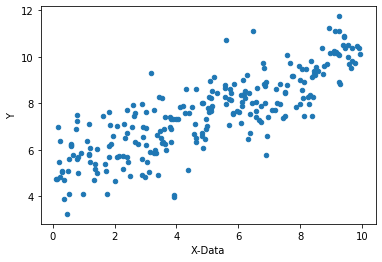

In [96]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
#This ends with creating a prefect linear data with noise

In [0]:
batch_size = 8

In [0]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
#model
y_model = m* xph + b

In [0]:
#Cost fucntion
error =tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimiser.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)

  batches = 50000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size= batch_size)
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m,model_b = sess.run([m,b])

In [105]:
model_mWhat is Colaboratory?

Object `Colaboratory` not found.


In [106]:
model_b

5.0102406

In [0]:
y_hat = x_data * model_m + model_b

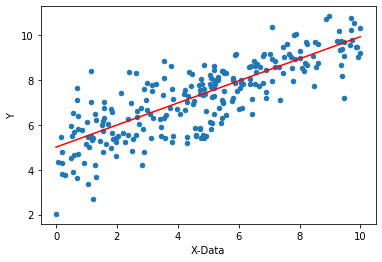

In [108]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [0]:
#Estimater API
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [110]:
estimater = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbqp1p6ii', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9ac9816518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
#Train test split
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state = 0)

In [113]:
x_train.shape
x_eval.shape

(300000,)

In [0]:
input_func= tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size=4, num_epochs = None, shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size=4, num_epochs = 1000, shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size=4, num_epochs = 1000, shuffle=False)

In [117]:
estimater.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbqp1p6ii/model.ckpt.
INFO:tensorflow:loss = 174.3641, step = 1
INFO:tensorflow:global_step/sec: 607.473
INFO:tensorflow:loss = 18.832489, step = 101 (0.171 sec)
INFO:tensorflow:global_step/sec: 682.418
INFO:tensorflow:loss = 4.641807, step = 201 (0.143 sec)
INFO:tensorflow:global_step/sec: 619.362
INFO:tensorflow:loss = 14.918481, step = 301 (0.166 sec)
INFO:tensorflow:global_step/sec: 604.366
INFO:tensorflow:loss = 7.802246, step = 401 (0.161 sec)
INFO:tensorflow:global_step/sec: 729.364
INFO:tensorflow:loss = 1.8488909, step = 501 (0.142 sec)
INFO:tensorflow:global_step/sec: 527.522
INFO:tensorflow:loss = 1.3275005, step = 601 (0.188 sec)
INFO:tensorflow:global_step/sec: 802.953
INFO:tensorflow:los

In [118]:
train_matrix = estimater.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-12T13:30:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbqp1p6ii/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-02-12-13:30:49
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.094778, global_step = 1000, label/mean = 7.517061, loss = 4.379112, prediction/mean = 7.428476
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [119]:
eval_matrix = estimater.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-12T13:30:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbqp1p6ii/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-02-12-13:30:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.094778, global_step = 1000, label/mean = 7.517061, loss = 4.379112, prediction/mean = 7.428476
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [0]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({"x":np.linspace(0,10,10)},shuffle = False)

In [121]:
list(estimater.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbqp1p6ii/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4236536], dtype=float32)},
 {'predictions': array([5.0859227], dtype=float32)},
 {'predictions': array([5.7481914], dtype=float32)},
 {'predictions': array([6.4104605], dtype=float32)},
 {'predictions': array([7.072729], dtype=float32)},
 {'predictions': array([7.734998], dtype=float32)},
 {'predictions': array([8.397267], dtype=float32)},
 {'predictions': array([9.059536], dtype=float32)},
 {'predictions': array([9.721806], dtype=float32)},
 {'predictions': array([10.384074], dtype=float32)}]

In [122]:
predictions= []
for x in estimater.predict(input_fn = input_func_predict):
  predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbqp1p6ii/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [123]:
predictions

[array([4.4236536], dtype=float32),
 array([5.0859227], dtype=float32),
 array([5.7481914], dtype=float32),
 array([6.4104605], dtype=float32),
 array([7.072729], dtype=float32),
 array([7.734998], dtype=float32),
 array([8.397267], dtype=float32),
 array([9.059536], dtype=float32),
 array([9.721806], dtype=float32),
 array([10.384074], dtype=float32)]

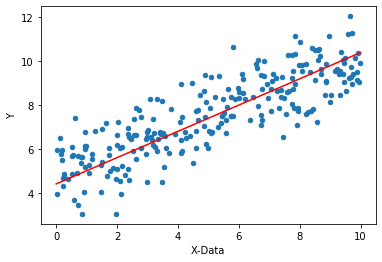

In [126]:
my_data.sample(n= 250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

In [0]:
import requests
from bs4 import BeautifulSoup as soup
r = requests.get('https://www.usu.edu/degrees/index.cfm?az=all')
html = '\n'.join(r.text.splitlines()[211:499])
html

'<li><a href="/degrees/index.cfm?id=212">Aerospace Studies (Air Force ROTC)</a> </li>\n<li><a href="/degrees/index.cfm?id=80">Agribusiness</a> (BS)</li>\n<li><a href="/degrees/index.cfm?id=78">Agricultural Communication</a> (BS)</li>\n<li><a href="/degrees/index.cfm?id=75">Agricultural Education</a> (BS)</li>\n<li><a href="/degrees/index.cfm?id=77">Agricultural Machinery Technology</a> (AAS, Cert)</li>\n<li><a href="/degrees/index.cfm?id=1156">Agricultural Science</a> (AS)</li>\n<li><a href="/degrees/index.cfm?id=84">Agricultural Systems Technology</a> (BS)</li>\n<li><a href="/degrees/index.cfm?id=200">Agricultural Systems Technology and Agribusiness (Composite)</a> (BS)</li>\n<li><a href="/degrees/index.cfm?id=96">Aircraft Maintenance Technician - Airframe and Powerplant</a> (AAS)</li>\n<li><a href="/degrees/index.cfm?id=97">American Studies</a> (BS, BA)</li>\n<li><a href="/degrees/index.cfm?id=156">Animal, Dairy, and Veterinary Sciences</a> (BS)</li>\n<li><a href="/degrees/index.cfm?

In [0]:
d = [[getattr(c, 'text', c).strip() for c in i] for i in soup(html, 'html.parser').find_all('li')]
d[:3]

[['Aerospace Studies (Air Force ROTC)', ''],
 ['Agribusiness', '(BS)'],
 ['Agricultural Communication', '(BS)']]

In [0]:
deg_list = [item[1] for item in d]
deg_list

['',
 '(BS)',
 '(BS)',
 '(BS)',
 '(AAS, Cert)',
 '(AS)',
 '(BS)',
 '(BS)',
 '(AAS)',
 '(BS, BA)',
 '(BS)',
 '(BS, BA)',
 '(BS)',
 '(BFA, BA, BS)',
 '(BA)',
 '(BA)',
 '(AAS, CC)',
 '(BS)',
 '(BS)',
 '(BS)',
 '(BS)',
 '(BS, BA)',
 '(BS, BA)',
 '(CC)',
 '(AB)',
 '(BS, BA)',
 '(CNA)',
 '(BS, BA)',
 '(Endorsement)',
 '(BS)',
 '(BA)',
 '(BS)',
 '(BS)',
 '(BS, BA)',
 '(BS, BA)',
 '(2nd BS)',
 '(BS)',
 '(BS)',
 '(BS)',
 '(AAS)',
 '(AS)',
 '(Cert)',
 '(AAS)',
 '(BS)',
 '(CP)',
 '(BS, BA)',
 '(BS, BA)',
 '(BS, BA)',
 '(BS, BA)',
 '(BS, BA)',
 '(Apprenticeship)',
 '(BS)',
 '(CC)',
 '(BS, BA)',
 '(BS, BA)',
 '(BS, BA)',
 '(CC)',
 '(BA, BS)',
 '(BS)',
 '(BS)',
 '(BS)',
 '(BS, BA)',
 '(BS)',
 '(BS, BA)',
 '(BS)',
 '(BS)',
 '(BS)',
 '(BA)',
 '(AS, AA)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(BA, BS)',
 '(AAS)',
 '(BS)',
 '(BS, BA)',
 '(BA)',
 '(Cert)',
 '(BA)',
 '(BS)',
 '(CC)',
 '(BA, BS)',
 '(BS)',
 '(BS, BA)',
 '(BS)',
 '(BS)',
 '

In [0]:
deg_list = ' '.join(deg_list).replace(')','').split()
myset = list(set(deg_list))
for i in myset:
  print(i+'\n')

AB

BID

AS,

MFSQ

ME

Apprenticeship

BFA,

ME,

AuD

MRC

MPH

CP

MDATA

AAS

MS,

2nd

EdS,

EdD

MTC

MFA

EdS

MA

MAE

BLA

Endorsement

MAcc

PhD,

MMFT

MFP

AAS,

MSLT

CC,

BSN

MNR

MDA

MMIS

BA

MHR

MSW

BS

BM

AA

BA,

CNA

PhD

MBA

MHDFS,

Licensure

BS,

MAS

DVM

MEd

MLA

MS

Cert

MCS,

MMath

MEd,

AS

MA,

CC

MPSH

MM

